# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

# Importing Dataset

In [2]:
with open('train.p',mode='rb') as training_data:
    train=pickle.load(training_data)

In [3]:
with open('test.p',mode='rb') as test_data:
    test=pickle.load(test_data)

In [4]:
with open('valid.p',mode='rb') as validation_data:
    valid=pickle.load(validation_data)

Classifying input and output of dataset(Features-x and labels-y)

In [5]:
x_train,y_train=train['features'],train['labels']

In [6]:
x_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
x_test,y_test=test['features'],test['labels']

In [9]:
x_valid,y_valid=valid['features'],valid['labels']

In [10]:
x_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

In [12]:
x_valid.shape

(4410, 32, 32, 3)

In [13]:
y_valid.shape

(4410,)

HERE WE UNDERSTAND THAT OUR DATASET CONSISTS OF 32*32 INPUT IMAGE WITH 3 CHANNELS (RED,GREEN,BLUE),34799 TRAINING EXAMPLES,4410 VALIDATION EXAMPES AND 12630 TEST EXAMPLES

# Image Visualisation

In [14]:
i=np.random.randint(1,len(x_train))

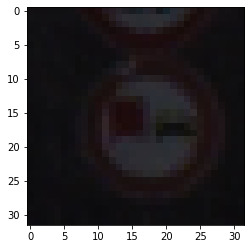

In [15]:
plt.imshow(x_train[i])

In [16]:
y_train[i]

10

In [17]:
w_grid=5
l_grid=5

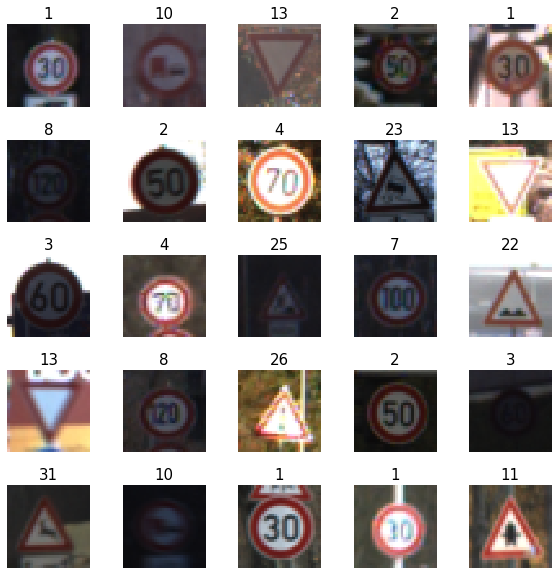

In [43]:
fig,axes=plt.subplots(l_grid,w_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


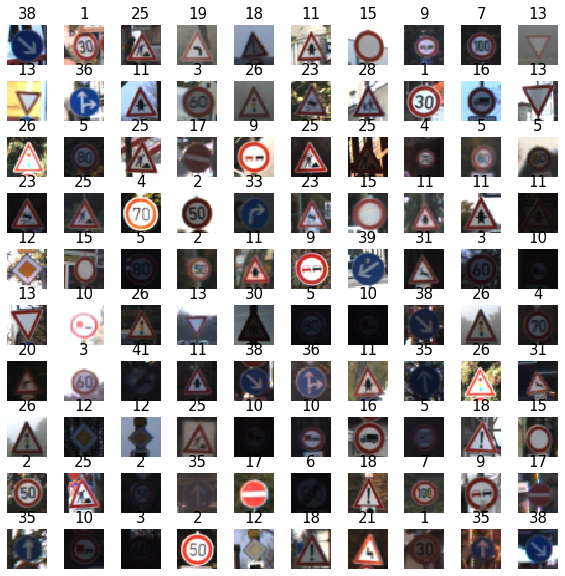

In [44]:
p_grid=10
q_grid=10
fig,axes=plt.subplots(p_grid,q_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,p_grid*q_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Gray scale conversion and normalisation

In [19]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)

In [20]:
x_test,y_test=shuffle(x_test,y_test)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)

In [21]:
x_valid,y_valid=shuffle(x_valid,y_valid)
x_valid_gray=np.sum(x_valid/3,axis=3,keepdims=True)

In [22]:
x_train_gray.shape

(34799, 32, 32, 1)

In [23]:
x_train_gray_norm=(x_train_gray-128)/128
x_train_gray_norm

array([[[[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[-0.5546875 ],
         [-0.6328125 ],
         [-0.609375  ],
         ...,
         [-0.40625   ],
         [-0.29427083],
         [-0.1953125 ]],

        [[-0.59375   ],
         [-0.61197917],
         [-0.58854167],
         ...,
         [-0.6953125 ],
         [-0.69010417],
         [-0.69010417]],

        [[-0.63802083],
         [-0.60677083],
         [-0.5859375 ],
         ...,
         [-0.625     ],
         [-0.6328125 ],
         [-0.66145833]]],


       [[[-0.77083333],


In [24]:
x_test_gray_norm=(x_test_gray-128)/128
x_valid_gray_norm=(x_valid_gray-128)/128

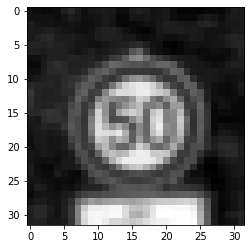

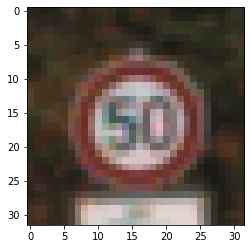

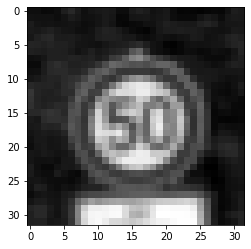

In [25]:
i=random.randint(1,len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(),cmap='gray')


# Building deep neural Model


In [26]:
from tensorflow.keras import datasets,layers,models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense,Activation,ZeroPadding2D,Convolution2D
cnn=models.Sequential()
cnn.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Dropout(0.1)) 
cnn.add(layers.Conv2D(16,(5,5),activation='relu'))  
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Flatten())
cnn.add(layers.Dense(120,activation='relu'))
cnn.add(layers.Dense(84,activation='relu'))
cnn.add(layers.Dense(43,activation='softmax'))
cnn.summary()


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
____

# Training CNN

In [38]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=cnn.fit(x_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(x_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 21s 606us/sample - loss: 0.0273 - acc: 0.9918 - val_loss: 0.4303 - val_acc: 0.9243
Epoch 2/50
34799/34799 [==============================] - 17s 476us/sample - loss: 0.0276 - acc: 0.9918 - val_loss: 0.3968 - val_acc: 0.9295
Epoch 3/50
34799/34799 [==============================] - 16s 473us/sample - loss: 0.0267 - acc: 0.9914 - val_loss: 0.4061 - val_acc: 0.9261
Epoch 4/50
34799/34799 [==============================] - 17s 501us/sample - loss: 0.0294 - acc: 0.9911 - val_loss: 0.4363 - val_acc: 0.9206
Epoch 5/50
34799/34799 [==============================] - 18s 520us/sample - loss: 0.0281 - acc: 0.9911 - val_loss: 0.3880 - val_acc: 0.9274
Epoch 6/50
34799/34799 [==============================] - 17s 478us/sample - loss: 0.0271 - acc: 0.9917 - val_loss: 0.3540 - val_acc: 0.9299
Epoch 7/50
34799/34799 [==============================] - 17s 478us/sample - loss: 0.0236 - acc: 0.9930 -

# Acess Trained CNN Model Performance

In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
accuracy=history.history['acc']
val_accuracy=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

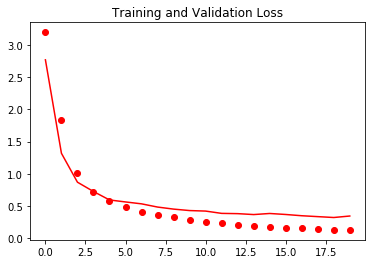

In [40]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')


In [32]:
predicted_classes=cnn.predict_classes(x_test_gray_norm)
y_true=y_test


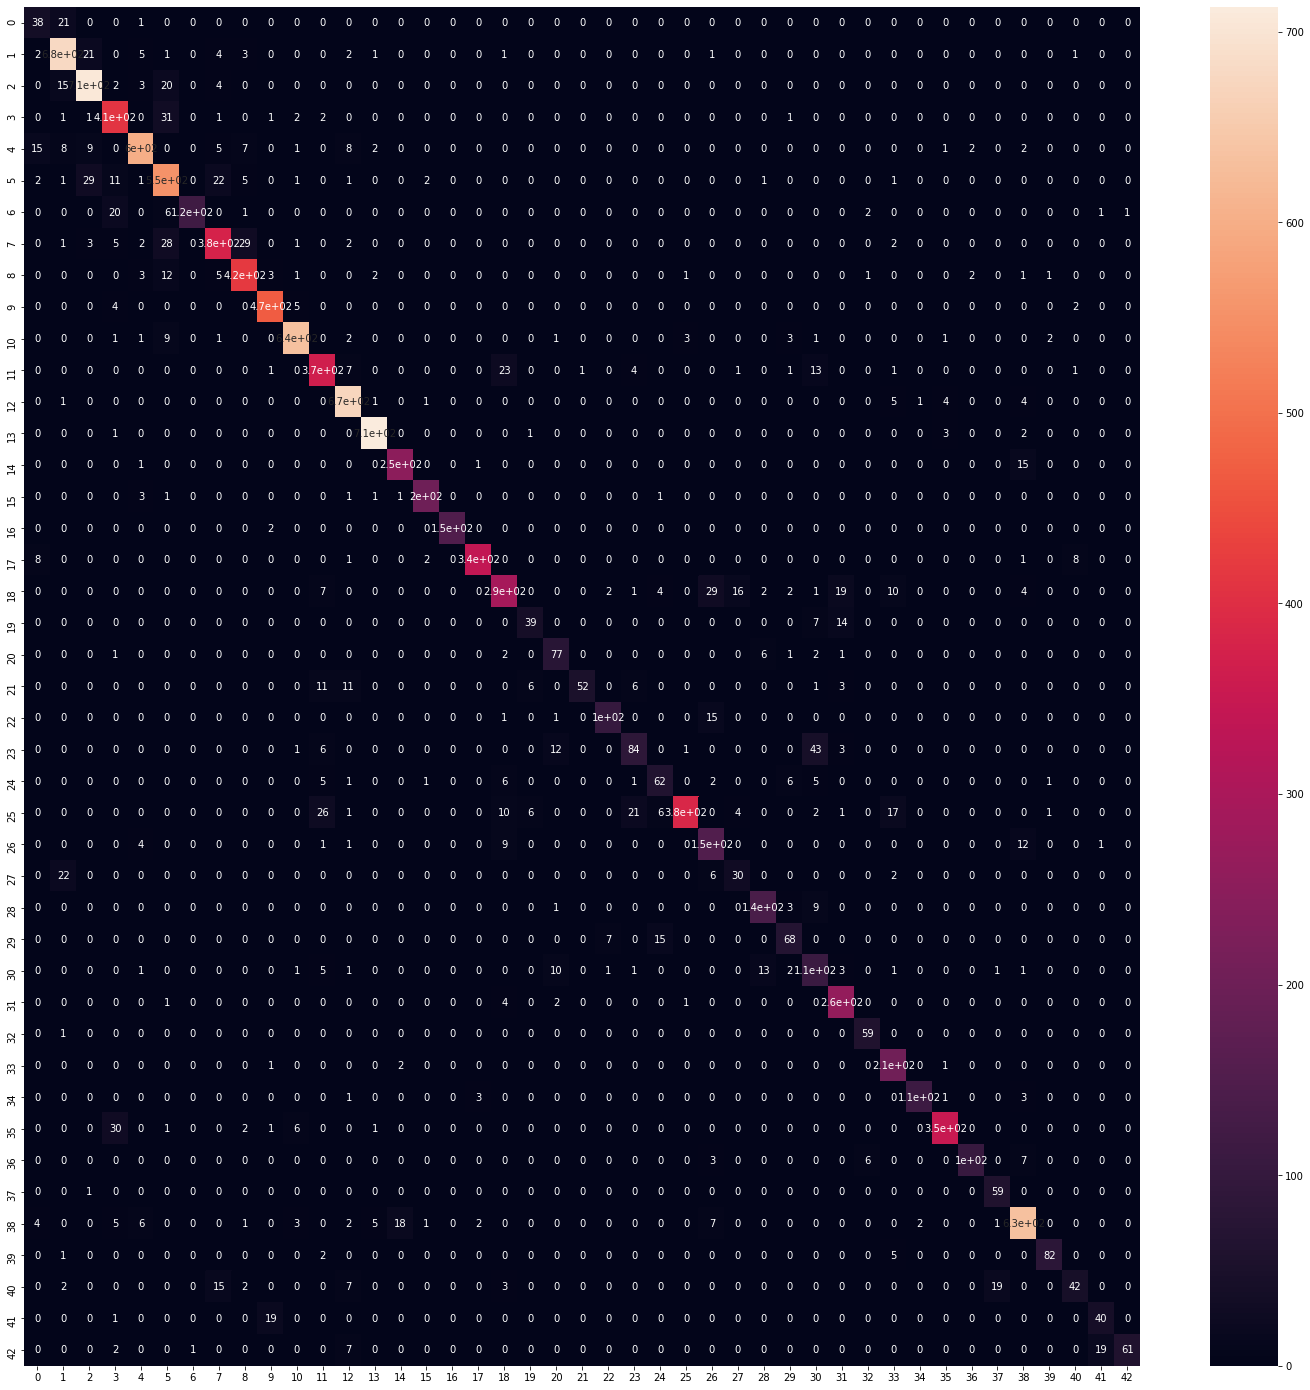

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

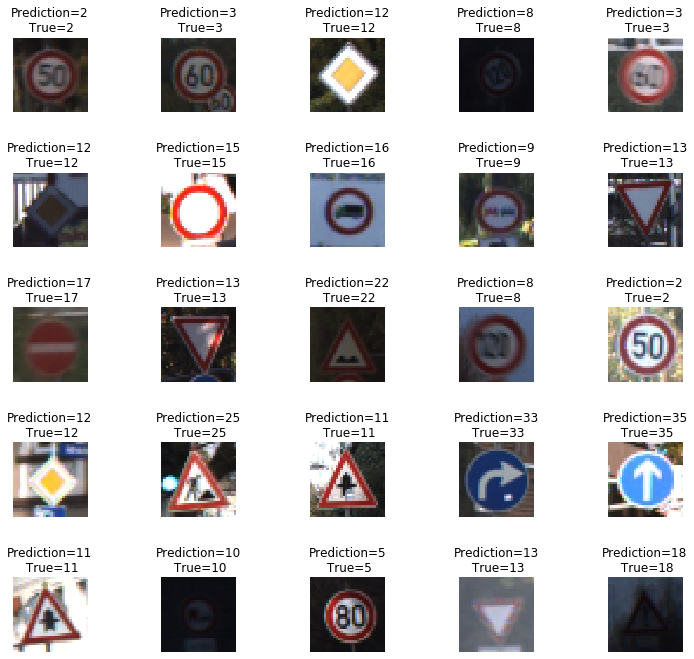

In [45]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [46]:
score=cnn.evaluate(x_test_gray_norm,y_test)
print('Test accuracy:{}'.format(score[1]))

12630/12630 [==============================] - 7s 542us/sample - loss: 0.5780 - acc: 0.9340
Test accuracy:0.9339667558670044
